In [28]:
import folium
from folium.plugins import MarkerCluster
import requests
import json
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
 
 
jsonList = ['toilets/2.geojson','toilets/3.geojson', 'toilets/4.geojson', 'toilets/6.geojson', 'toilets/5.geojson', 'toilets/7.geojson', 'toilets/8.geojson', 'toilets/9.geojson']
 
coordinatesList = []

 
def cph():
    counter1 = 0
    with open('toilets/1.geojson') as data_file: 
        data = json.load(data_file)
    # for each feature in the json file, create a marker
    for feature in data["features"]:
        counter1 += 1
        lat, long = feature["properties"]["latitude"], feature["properties"]["longitude"]
        marker = folium.Marker(location=[lat, long], icon=folium.Icon(color='green', icon='remove-sign'))
        marker.add_to(m)
    print('No of toilets: ', str(counter1))
    
def byer():
    text = 0
    counter2 = 0
    for list in jsonList:
        with open(list) as data_file:    
            data = json.load(data_file)
        for feature in data["features"]:
            counter2 += 1
            lat, long = feature["geometry"]["coordinates"][1], feature["geometry"]["coordinates"][0]
            marker = folium.Marker(location=[lat, long], icon=folium.Icon(color='yellow', icon='remove-sign'))
            marker.add_to(m)
        print('No. of toilets: ', str(counter2))
cph()
byer()
 
latitudes = []

def lat_cph():
    cph_latitudes = []
    with open('toilets/1.geojson') as data_file: 
        data = json.load(data_file)
    # for each feature in the json file, create a marker
    for feature in data["features"]:
        lat= feature["properties"]["latitude"]
        cph_latitudes.append(lat)
    return cph_latitudes

def lat_byer():
    byer_latitudes = []
    for list in jsonList:
        with open(list) as data_file:    
            data = json.load(data_file)
        for feature in data["features"]:
            lat = feature["geometry"]["coordinates"][1]
            byer_latitudes.append(lat)
    return byer_latitudes

def long_cph():
    cph_longitudes = []
    with open('toilets/1.geojson') as data_file: 
        data = json.load(data_file)
    # for each feature in the json file, create a marker
    for feature in data["features"]:
        long = feature["properties"]["longitude"]
        cph_longitudes.append(long)
    return cph_longitudes

def long_byer():
    byer_longitudes = []
    for list in jsonList:
        with open(list) as data_file:    
            data = json.load(data_file)
        for feature in data["features"]:
            long = feature["geometry"]["coordinates"][0]
            byer_longitudes.append(long)
    return byer_longitudes

"""The number of toilets is 215 + 227 = 442"""
for i in lat_cph():
    latitudes.append(i)
for i in lat_byer():
    latitudes.append(i)

longitudes = []
for i in long_cph():
    longitudes.append(i)
for i in long_byer():
    longitudes.append(i)
print(len(longitudes))


#print(latitudes)
#print(lat_byer())
#print(len(lat_byer()))
#print(lat_cph())
#print(len(lat_cph()))
# this displays the map in the browser


No of toilets:  215
No. of toilets:  29
No. of toilets:  48
No. of toilets:  65
No. of toilets:  108
No. of toilets:  136
No. of toilets:  152
No. of toilets:  194
No. of toilets:  227
442


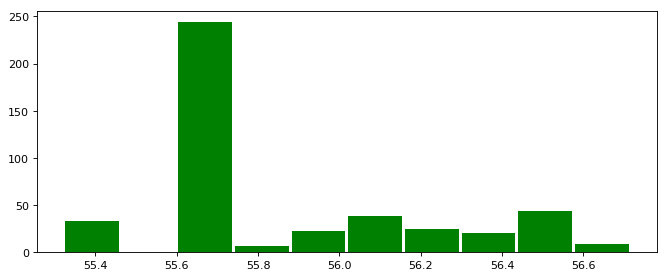

In [6]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.hist(latitudes, bins = 10, rwidth = 0.95, color = 'g')
plt.show()

In [24]:
from math import radians, cos, sin, asin, sqrt
import folium
import json


kmList = []

def haversine(lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1 = 55.68164938
    lon1 = 12.52981061
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    km = int(km)
    kmList.append(km)

def cph():
    with open('toilets/1.geojson') as data_file:    
        data = json.load(data_file)
    # for each feature in the json file, create a marker
    for feature in data["features"]:
        lat, long = feature["properties"]["latitude"], feature["properties"]["longitude"]
        haversine(long, lat)
       
 
def byer():
    text = 0
    for list in jsonList:
        with open(list) as data_file:    
            data = json.load(data_file)
        for feature in data["features"]:
            lat, long = feature["geometry"]["coordinates"][1], feature["geometry"]["coordinates"][0]
            haversine(long, lat)

 
           
cph()
#byer()
print(kmList)
print(len(kmList))


[4, 4, 3, 3, 2, 6, 7, 8, 7, 7, 6, 6, 3, 1, 2, 6, 2, 2, 2, 2, 4, 3, 3, 3, 1, 1, 3, 2, 5, 4, 4, 3, 1, 2, 5, 4, 2, 3, 1, 2, 3, 3, 3, 3, 2, 4, 5, 3, 2, 4, 2, 3, 1, 2, 1, 3, 3, 2, 2, 2, 5, 3, 2, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 3, 5, 3, 1, 6, 2, 3, 3, 5, 1, 3, 2, 4, 4, 5, 4, 3, 1, 2, 3, 1, 1, 1, 4, 2, 4, 1, 3, 3, 2, 3, 3, 4, 2, 3, 2, 5, 4, 5, 2, 2, 1, 3, 3, 2, 1, 1, 2, 3, 3, 6, 5, 4, 2, 6, 6, 6, 5, 5, 2, 2, 4, 3, 3, 1, 2, 2, 3, 1, 1, 1, 4, 3, 6, 2, 5, 7, 4, 3, 3, 4, 4, 2, 4, 4, 8, 7, 5, 3, 8, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 5, 6, 2, 4, 1, 1, 3, 4, 1, 1, 2, 2, 4, 7, 3, 3, 4, 2, 5, 4, 3, 1, 4, 5, 5]
215


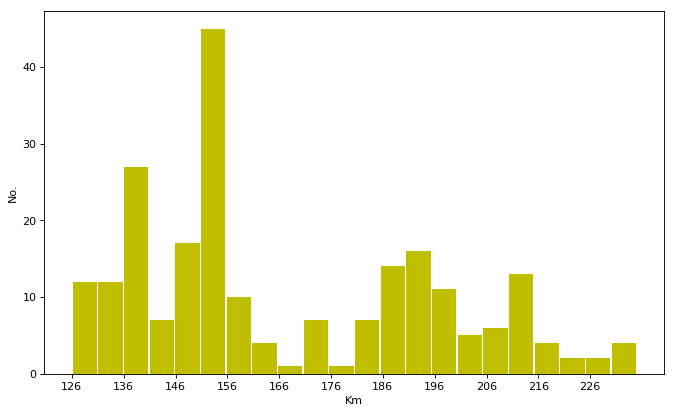

In [14]:
import numpy as np 
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(kmList, bins = 22, rwidth = 0.95, color = 'y')
plt.xlabel('Km')
plt.ylabel('No.')
plt.xticks(np.arange(min(kmList), max(kmList)+1, 10))
plt.show()

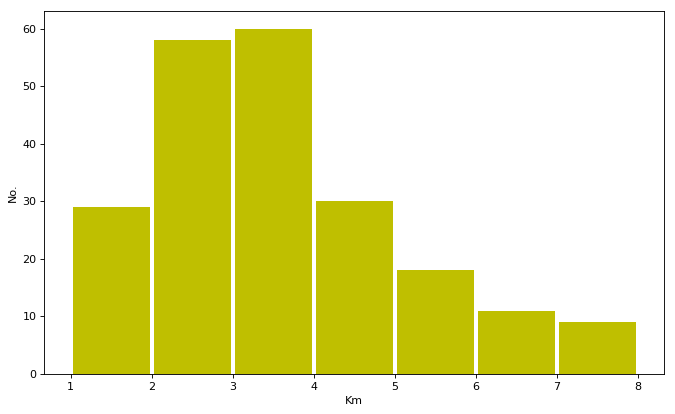

In [26]:
import numpy as np 
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(kmList, bins = 7, rwidth = 0.95, color = 'y')
plt.xlabel('Km')
plt.ylabel('No.')
plt.xticks(np.arange(min(kmList), max(kmList)+1, 1))
plt.show()